In [49]:
import re

data=[
    "地下室 暂无数据",
    "地下室 板楼",
    "地下室 塔楼",
    "未知(共11层) 2003年建板塔结合",
    "中楼层(共9层) 暂无数据",
    "低楼层(共24层) 塔楼",
    "高楼层(共18层) 1988年建塔楼"
]

for line in data:    
    matchObj = re.match( '(.*(层|室|知))(\(共([0-9]+)层\))? (([0-9]+)年建)?((板|塔).*)?', line, re.M|re.I)
    if matchObj:
        print("matchObj:",matchObj.group())
        print('position:',matchObj.group(1))
        print('overallHeight:',matchObj.group(4))
        print('buitYear:',matchObj.group(6))
        print('type:',matchObj.group(7))

        print("----")
    else:
        print("no match")
        print("----")

matchObj: 地下室 
position: 地下室
overallHeight: None
buitYear: None
type: None
----
matchObj: 地下室 板楼
position: 地下室
overallHeight: None
buitYear: None
type: 板楼
----
matchObj: 地下室 塔楼
position: 地下室
overallHeight: None
buitYear: None
type: 塔楼
----
matchObj: 未知(共11层) 2003年建板塔结合
position: 未知
overallHeight: 11
buitYear: 2003
type: 板塔结合
----
matchObj: 中楼层(共9层) 
position: 中楼层
overallHeight: 9
buitYear: None
type: None
----
matchObj: 低楼层(共24层) 塔楼
position: 低楼层
overallHeight: 24
buitYear: None
type: 塔楼
----
matchObj: 高楼层(共18层) 1988年建塔楼
position: 高楼层
overallHeight: 18
buitYear: 1988
type: 塔楼
----


In [53]:
import pandas as pd
import numpy as np

file='./Lianjia_Processed.xlsx'

try:
    data=pd.read_excel(file,engine='openpyxl')
except Exception as e:
    raise e

In [58]:
ans=data.position.str.extract('(.*(层|室|知))(\(共([0-9]+)层\))? (([0-9]+)年建)?((板|塔).*)?',expand=True)

In [59]:
ans

,0,1,2,3,4,5,6,7
0,地下室,室,(共6层),6,1996年建,1996,板楼,板
1,顶层,层,(共5层),5,1980年建,1980,板楼,板
2,中楼层,层,(共7层),7,2002年建,2002,板楼,板
3,底层,层,(共6层),6,1980年建,1980,板楼,板
4,高楼层,层,(共6层),6,1994年建,1994,板楼,板
...,...,...,...,...,...,...,...,...
670892,高楼层,层,(共11层),11,2010年建,2010,板塔结合,板
670893,低楼层,层,(共11层),11,2010年建,2010,板楼,板
670894,中楼层,层,(共6层),6,2005年建,2005,板楼,板
670895,高楼层,层,(共11层),11,2010年建,2010,板塔结合,板


In [61]:
new_data=data
new_data['position']=ans[0]
new_data['block-height']=ans[3]
new_data['built-year']=ans[5]
new_data['type']=ans[6]
new_data

,block,area,direction,decoration,year,month,deal price,position,unit price,region,sub-region,room,hall,blockHeight,builtYear,type,block-height,built-year
0,朗家胡同13号院,56.10,南 北,精装,2020,12,515.0,地下室,91801.0,东城,安定门,2,1,6,1996,板楼,6,1996
1,青年湖东里,50.62,南 北,简装,2020,12,511.0,顶层,100949.0,东城,安定门,2,1,5,1980,板楼,5,1980
2,永康胡同1号院,84.50,南 北,毛坯,2020,12,920.0,中楼层,108876.0,东城,安定门,3,1,7,2002,板楼,7,2002
3,六铺炕,79.04,东 西 南,简装,2020,12,837.0,底层,105896.0,东城,安定门,4,1,6,1980,板楼,6,1980
4,青年湖东里,61.20,南 北,简装,2020,12,575.0,高楼层,93955.0,东城,安定门,2,1,6,1994,板楼,6,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670892,康营家园五区,85.52,南,其他,2012,4,117.0,高楼层,13682.0,顺义,中央别墅区,2,1,11,2010,板塔结合,11,2010
670893,康营家园十五区,86.00,南 北,其他,2012,3,110.0,低楼层,12791.0,顺义,中央别墅区,2,2,11,2010,板楼,11,2010
670894,天恒花园,124.08,南 北,其他,2012,3,179.0,中楼层,14427.0,顺义,中央别墅区,3,2,6,2005,板楼,6,2005
670895,康营家园五区,89.00,南 北,其他,2012,2,103.0,高楼层,11574.0,顺义,中央别墅区,2,1,11,2010,板塔结合,11,2010


In [62]:
new_data.to_excel("./house_deal.xlsx",index=False)

<AxesSubplot:ylabel='Frequency'>

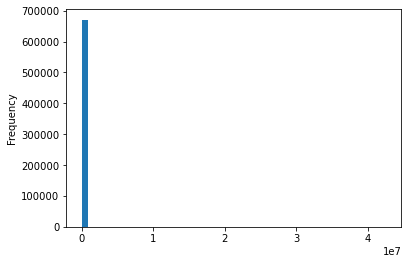

pd.options.display.max_rows=None
print(new_data[''].value_counts())